In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
data = pd.read_csv('/content/archive.zip', header= None, names=col_names)
print(data.shape)
data.head()

(769, 9)


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [3]:
data.isnull().sum()

,0
pregnant,0
glucose,0
bp,0
skin,0
insulin,0
bmi,0
pedigree,0
age,0
label,0


In [4]:
feature_cols=['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
x=data[feature_cols].iloc[1:].astype(float)
y=data.label.iloc[1:].astype(float)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

display(x_train.shape, y_train.shape, x_test.shape , y_test.shape)

(614, 7)

(614,)

(154, 7)

(154,)

In [6]:
model= LogisticRegression(solver='lbfgs', max_iter=1000)

In [7]:
model= LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

In [8]:
conf_mat = metrics.confusion_matrix(y_test, y_pred)
print(conf_mat)
Accuracy_score = metrics.accuracy_score(y_test, y_pred)
print(Accuracy_score)
print("Accuracy in Percentage: ", (Accuracy_score)*100, '%')

[[88 12]
 [19 35]]
0.7987012987012987
Accuracy in Percentage:  79.87012987012987 %


<Axes: xlabel='Predicted', ylabel='Actual'>

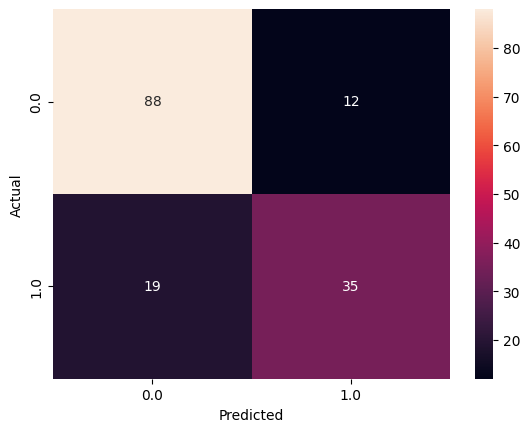

In [9]:
conf_mat=pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True)